In [1]:

%matplotlib inline
from neurodynex3.brunel_model import LIF_spiking_network
from neurodynex3.tools import plot_tools
import brian2 as b2


In [2]:
import numpy as np
import pandas as pd


In [3]:
print(b2.defaultclock.dt)
b2.defaultclock.dt = 1.0 *b2.ms
print(b2.defaultclock.dt)

50. us
1. ms


(<Figure size 1000x400 with 3 Axes>,
 <Axes: title={'center': 'Raster Plot'}, ylabel='neuron #'>,
 <Axes: title={'center': 'Population Activity'}, ylabel='A(t) [Hz]'>,
 <Axes: title={'center': 'Voltage Traces'}, xlabel='t [ms]', ylabel='V(t) [mV]'>)

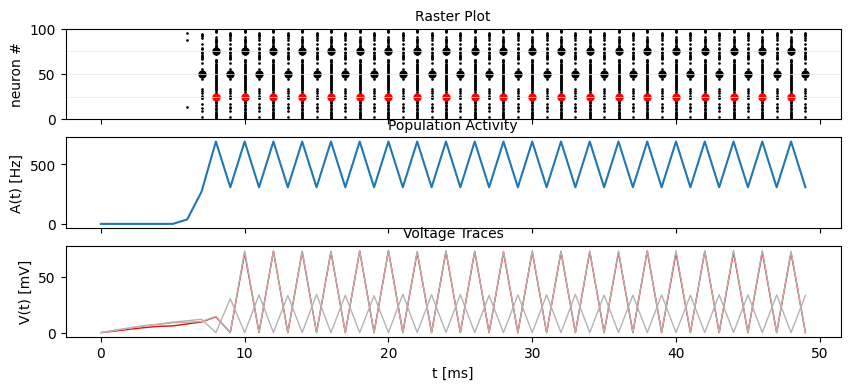

In [4]:
rate_monitor, spike_monitor, voltage_monitor, monitored_spike_idx = LIF_spiking_network.simulate_brunel_network(
    synaptic_delay = 1.0 * b2.ms,
    abs_refractory_period = 0 * b2.ms,

    N_Excit= 10_000,
    N_Inhib=  2_500,
    N_extern= 1_000,
    g=0, poisson_input_rate=20 *b2.Hz,
    sim_time=50. * b2.ms,

    membrane_time_scale= 10.0 *b2.ms,
    firing_threshold= 10.0 *b2.mV,
    v_reset= 0.0 *b2.mV,
)
plot_tools.plot_network_activity(
    rate_monitor, spike_monitor, voltage_monitor, spike_train_idx_list=monitored_spike_idx,
    t_min=0.*b2.ms,
)


In [5]:
st = spike_monitor.spike_trains()
st_df = pd.DataFrame(data={
    i: st[i][-20:]
    for i in spike_monitor.record
}, index=range(-20, 0))

In [6]:
uvs = pd.Series( np.array([st_df[c].values[1:]-st_df[c].values[:-1] for c in st_df.columns]).ravel() ).value_counts()
uvs

0.002    1062
0.002     431
0.002     207
0.002     200
dtype: int64

In [7]:
uvs.index[1] - uvs.index[0]

-3.469446951953614e-18

In [8]:
uvs.index[1] - uvs.index[2]

-1.734723475976807e-18

In [9]:
st_df

,12441,1224,9650,5177,4018,12467,10990,407,5124,2720,...,5555,1064,11700,2145,369,4769,897,1275,2295,1181
-20,0.010,0.010,0.011,0.010,0.010,0.010,0.010,0.010,0.010,0.011,...,0.011,0.010,0.011,0.011,0.011,0.011,0.010,0.010,0.010,0.010
-19,0.012,0.012,0.013,0.012,0.012,0.012,0.012,0.012,0.012,0.013,...,0.013,0.012,0.013,0.013,0.013,0.013,0.012,0.012,0.012,0.012
-18,0.014,0.014,0.015,0.014,0.014,0.014,0.014,0.014,0.014,0.015,...,0.015,0.014,0.015,0.015,0.015,0.015,0.014,0.014,0.014,0.014
-17,0.016,0.016,0.017,0.016,0.016,0.016,0.016,0.016,0.016,0.017,...,0.017,0.016,0.017,0.017,0.017,0.017,0.016,0.016,0.016,0.016
-16,0.018,0.018,0.019,0.018,0.018,0.018,0.018,0.018,0.018,0.019,...,0.019,0.018,0.019,0.019,0.019,0.019,0.018,0.018,0.018,0.018
-15,0.020,0.020,0.021,0.020,0.020,0.020,0.020,0.020,0.020,0.021,...,0.021,0.020,0.021,0.021,0.021,0.021,0.020,0.020,0.020,0.020
-14,0.022,0.022,0.023,0.022,0.022,0.022,0.022,0.022,0.022,0.023,...,0.023,0.022,0.023,0.023,0.023,0.023,0.022,0.022,0.022,0.022
-13,0.024,0.024,0.025,0.024,0.024,0.024,0.024,0.024,0.024,0.025,...,0.025,0.024,0.025,0.025,0.025,0.025,0.024,0.024,0.024,0.024
-12,0.026,0.026,0.027,0.026,0.026,0.026,0.026,0.026,0.026,0.027,...,0.027,0.026,0.027,0.027,0.027,0.027,0.026,0.026,0.026,0.026
-11,0.028,0.028,0.029,0.028,0.028,0.028,0.028,0.028,0.028,0.029,...,0.029,0.028,0.029,0.029,0.029,0.029,0.028,0.028,0.028,0.028
